In [30]:
import sys
from pathlib import Path

# Go two levels up to reach project root
project_root = Path.cwd().parents[1]  # from subfolder/ to notebook_folder/ to project_root/
scripts_path = project_root / "scripts"

if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

In [31]:
from neuralprophet import NeuralProphet, set_random_seed, set_log_level
import pandas as pd

set_random_seed(0)
# Disable logging messages unless there is an error
set_log_level("ERROR")


In [32]:
def modify(df, forecast=5):
    # figure out where 'yhat1' lives
    col_idx = df.columns.get_loc('yhat1')

    # loop 1…9
    for i in range(1, forecast):
        # compute which yhatN we need
        which = forecast - i + 1          # 10→1, 9→2, …, 2→9
        val   = df.iloc[-i][f'yhat{which}'] 
        # row number = -i (so i=1 → last row, i=9 → 9th-from-last)
        df.iat[-i, col_idx] = val

    # j = 0
    # for i in range(forecast+1, forecast+6):
    #     which = min(5, forecast - j +1)
    #     print(which)
    #     print(df.iloc[-i]['ds'])

    #     val = df.iloc[-i][f'yhat{which}']
    #     df.iat[-i, col_idx] = val
    #     j += 1

In [33]:
# 1) Instantiate a NeuralProphet model that learns from the past 60 days (n_lags)
#    to forecast the next 10 days (n_forecasts), with trend + all seasonalities on.
m = NeuralProphet(
    n_lags=5,                 # look back this many days as inputs
    n_forecasts=2,            # predict this many days ahead
    yearly_seasonality=True,   # model an annual cycle
    weekly_seasonality=True,   # model day-of-week cycle
    daily_seasonality=False,    # if intra-day data; set False for daily only
    seasonality_mode='additive',
    n_changepoints=10,
    # you can also tweak trend flexibility:
    trend_reg=0.5,                  
    trend_reg_threshold=True,
    normalize='standardize',
    drop_missing=True,
    epochs=10
)
m.set_plotting_backend("plotly-static")
# m.add_country_holidays('VN')

In [34]:
# 📂 Load dataset
file_path_1 = "../../ready_data/vn_index_data/cleaned_vn_index_data.csv"
df_1 = pd.read_csv(file_path_1)

# df_1.drop(columns=['Index'], inplace=True)

df = (
    df_1[['Date', 'VN_Index_Close']].rename(columns={
          'Date': 'ds',
          'VN_Index_Close': 'y'
      })
)

# convert the 'ds' column to datetime
df['ds'] = pd.to_datetime(df['ds'])

In [35]:
df

,ds,y
0,2000-07-28,100.00
1,2000-07-31,101.55
2,2000-08-02,103.38
3,2000-08-04,105.20
4,2000-08-07,106.92
...,...,...
6050,2025-06-23,1358.18
6051,2025-06-24,1366.77
6052,2025-06-25,1366.75
6053,2025-06-26,1365.67


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/lib/python3.11/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/lib/python3.11/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/lib/python3.11/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.




Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr:   0%|          | 0/245 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

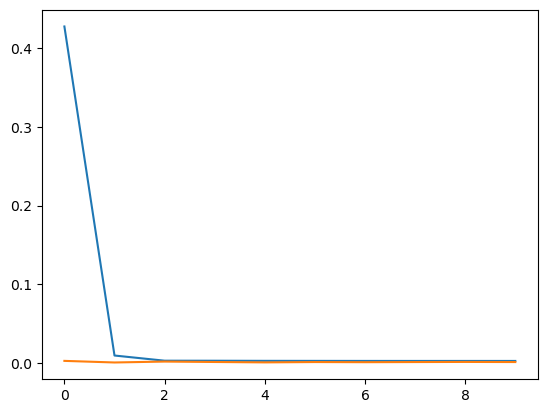

In [36]:
# 2) compute how many rows you need for validation
n_val = m.n_lags + m.n_forecasts  # must equal 60 + 10 = 70

# 3) split your DataFrame by row‐count
train_df = df.iloc[:-n_val]
val_df   = df.iloc[-n_val:]

# 4) fit using the fixed‐size validation set
metrics = m.fit(
    train_df,
    freq="B",
    validation_df=val_df,
    progress="plot",
)


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/lib/python3.11/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/lib/python3.11/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/lib/python3.11/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/lib/python3.11/site-packages/neuralprophet/data/split.py:273: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, t

Predicting: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/lib/python3.11/site-packages/neuralprophet/plot_forecast_plotly.py:100: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




          ds        y        yhat1        yhat2         ar1         ar2  \
0 2025-06-23  1358.18          NaN          NaN         NaN         NaN   
1 2025-06-24  1366.77          NaN          NaN         NaN         NaN   
2 2025-06-25  1366.75          NaN          NaN         NaN         NaN   
3 2025-06-26  1365.67          NaN          NaN         NaN         NaN   
4 2025-06-27  1371.44          NaN          NaN         NaN         NaN   
5 2025-06-30      NaN  1363.646973          NaN  163.628677         NaN   
6 2025-07-01      NaN          NaN  1369.471436         NaN  169.594421   

         trend  season_yearly  season_weekly  
0          NaN            NaN            NaN  
1          NaN            NaN            NaN  
2          NaN            NaN            NaN  
3          NaN            NaN            NaN  
4          NaN            NaN            NaN  
5  1120.481445      19.852005       59.68483  
6  1120.606323      19.251081       60.01965  


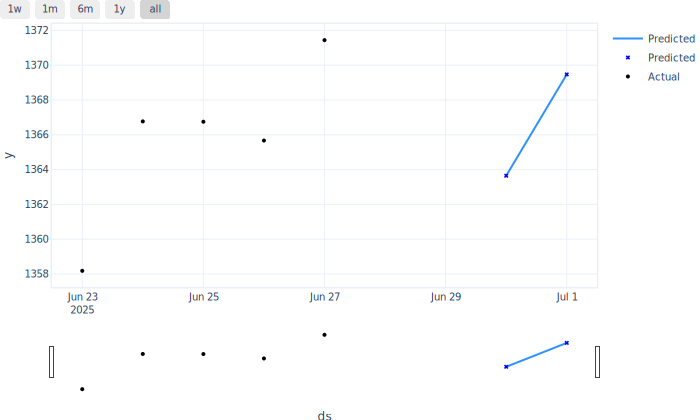

In [37]:
future = m.make_future_dataframe(df, periods=m.n_forecasts, n_historic_predictions=False)
forecast = m.predict(future, auto_extend=False, raw=False)

print(forecast)
modify(forecast, m.n_forecasts)
# Visualize the forecast
m.highlight_nth_step_ahead_of_each_forecast(step_number=1)
m.plot(forecast)

In [38]:
forecast.tail(11)

,ds,y,yhat1,yhat2,ar1,ar2,trend,season_yearly,season_weekly
0,2025-06-23,1358.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-06-24,1366.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-06-25,1366.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-06-26,1365.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-06-27,1371.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2025-06-30,NaN,1363.646973,NaN,163.628677,NaN,1120.481445,19.852005,59.68483
6,2025-07-01,NaN,1369.471436,1369.471436,NaN,169.594421,1120.606323,19.251081,60.01965


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/lib/python3.11/site-packages/neuralprophet/plot_forecast_plotly.py:410: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




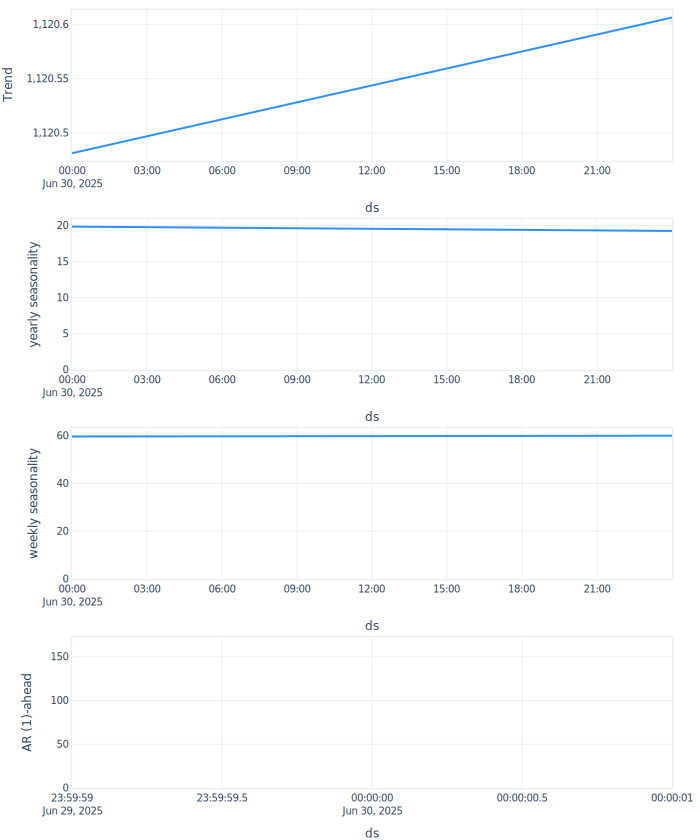

In [39]:
m.plot_components(forecast)

In [40]:
forecast.tail(12)

,ds,y,yhat1,yhat2,ar1,ar2,trend,season_yearly,season_weekly
0,2025-06-23,1358.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-06-24,1366.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-06-25,1366.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-06-26,1365.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-06-27,1371.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2025-06-30,NaN,1363.646973,NaN,163.628677,NaN,1120.481445,19.852005,59.68483
6,2025-07-01,NaN,1369.471436,1369.471436,NaN,169.594421,1120.606323,19.251081,60.01965


In [41]:
result = forecast[['ds', 'yhat1']].tail(5).rename(columns={
          'ds': 'Date',
          'yhat1': 'VN_Index_Close'
      })
result

,Date,VN_Index_Close
2,2025-06-25,NaN
3,2025-06-26,NaN
4,2025-06-27,NaN
5,2025-06-30,1363.646973
6,2025-07-01,1369.471436
